In [12]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [13]:
print(fruits.shape)

(59, 7)


In [14]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [15]:
print(fruits['fruit_name'].unique())


['apple' 'mandarin' 'orange' 'lemon']


In [16]:
print(fruits.groupby('fruit_name').size())


fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


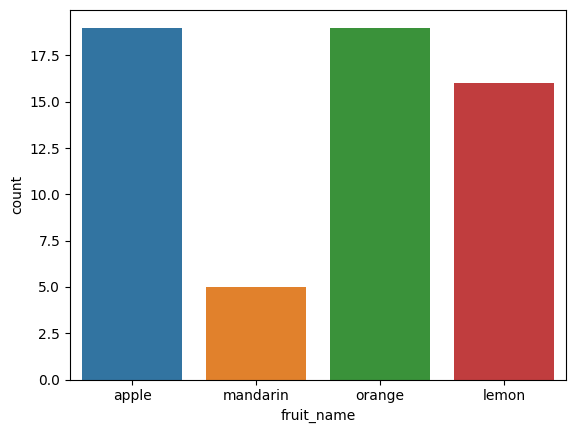

In [17]:
import seaborn as sns
sns.countplot(data=fruits, x='fruit_name', label="Count")
plt.show()


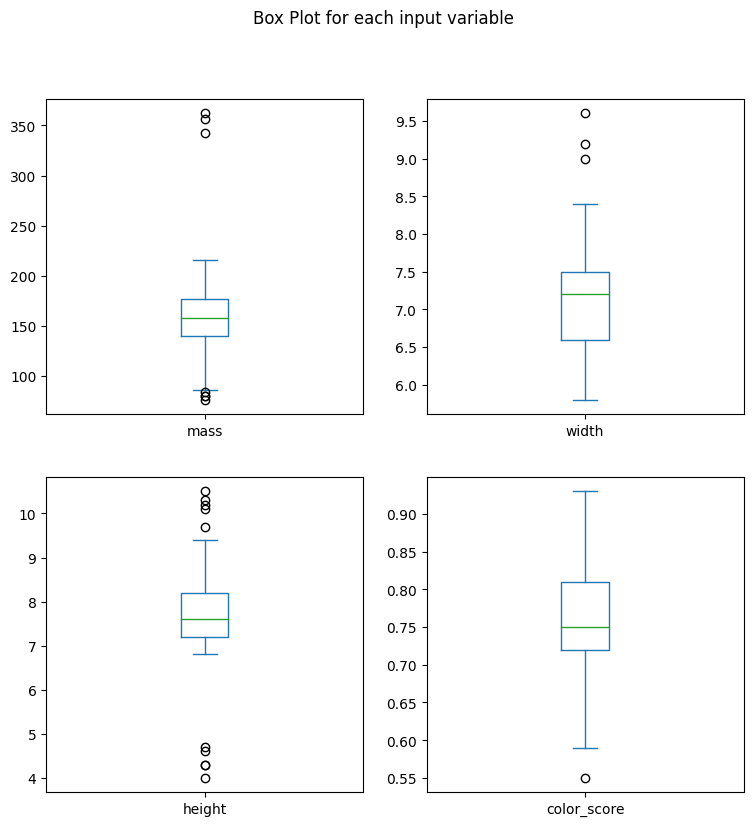

In [18]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(9, 9),
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()


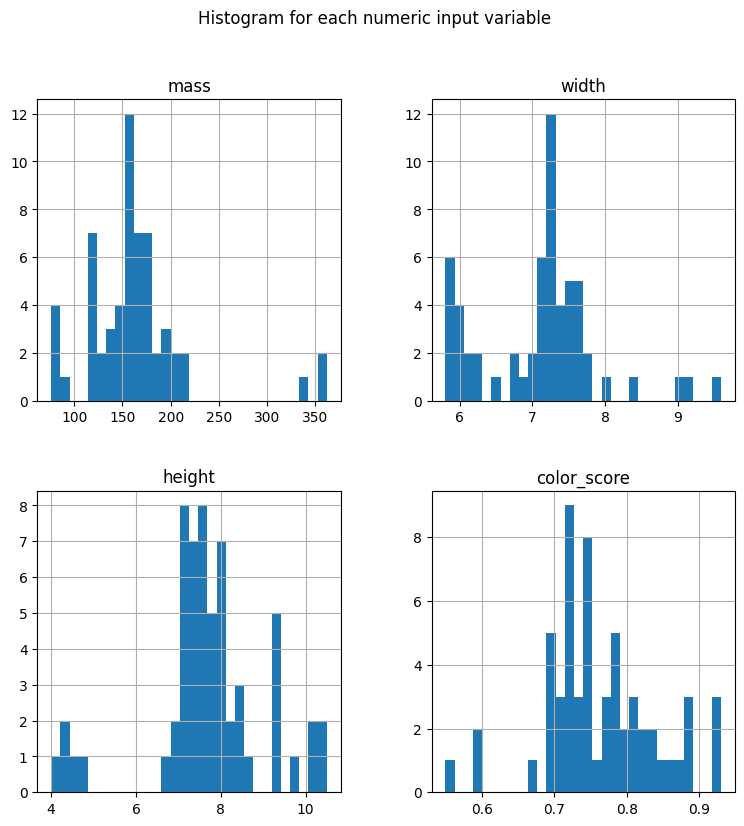

In [19]:
import pylab as pl
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9, 9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()


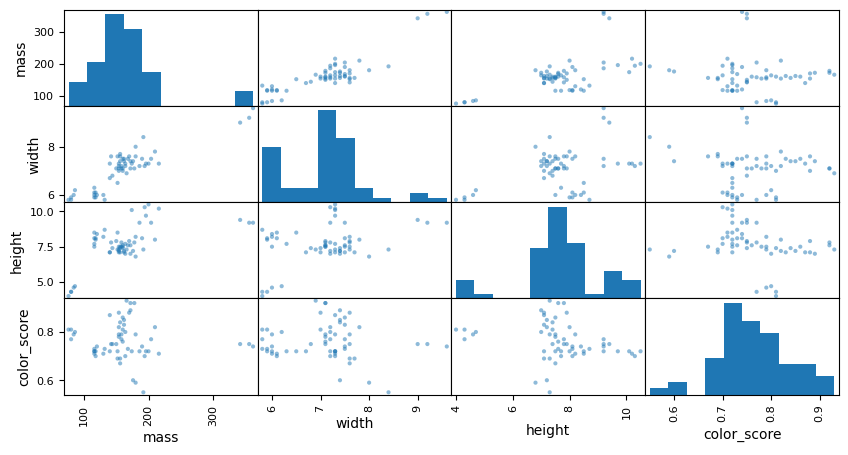

In [20]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(fruits.drop('fruit_label', axis=1), figsize=(10, 5))
plt.show()

C:\Users\susan\AppData\Local\Temp\ipykernel_20168\2047564622.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


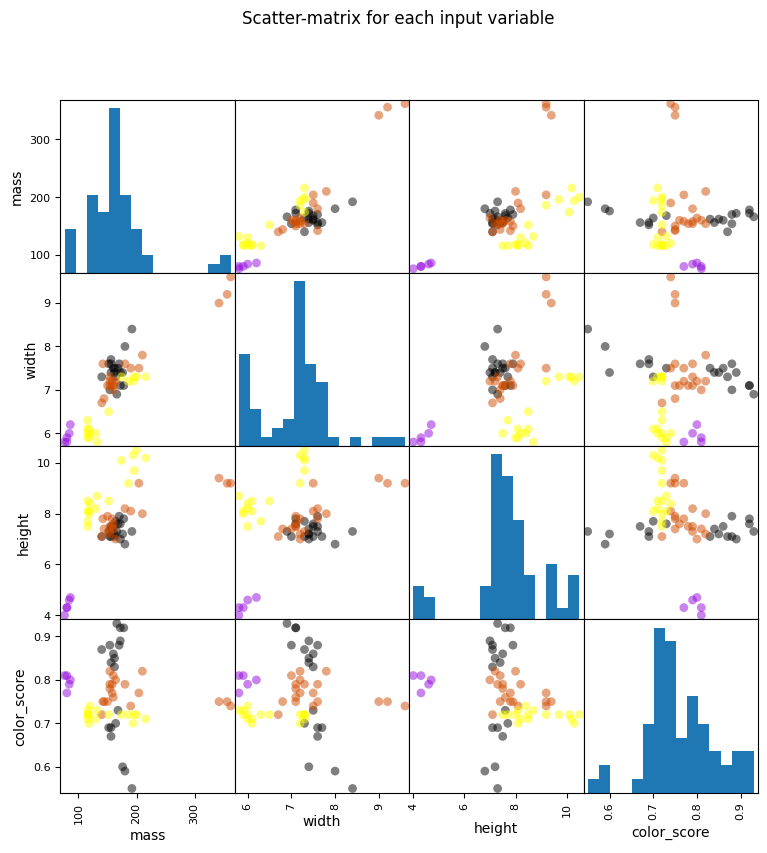

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c=y, marker='o', s=40, hist_kwds={
                                     'bins': 15}, figsize=(9, 9), cmap=cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix.png')


In [22]:
# Create Training and Test Sets and Apply Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
#LOGISTIC REGRESSION
# Import libraries
from sklearn.linear_model import LogisticRegression
# Create an instance of LogisticRegression
logreg = LogisticRegression()
# Fit the model to the training data
logreg.fit(X_train, y_train)
# Print accuracy on the training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
# Print accuracy on the test set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))
arr = []
arr.append([logreg.score(X_train, y_train),logreg.score(X_test, y_test)])


Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))

#Setting max decision tree depth to help avoid overfitting
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

arr.append([clf2.score(X_train, y_train),clf2.score(X_test, y_test)])


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73
Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.53


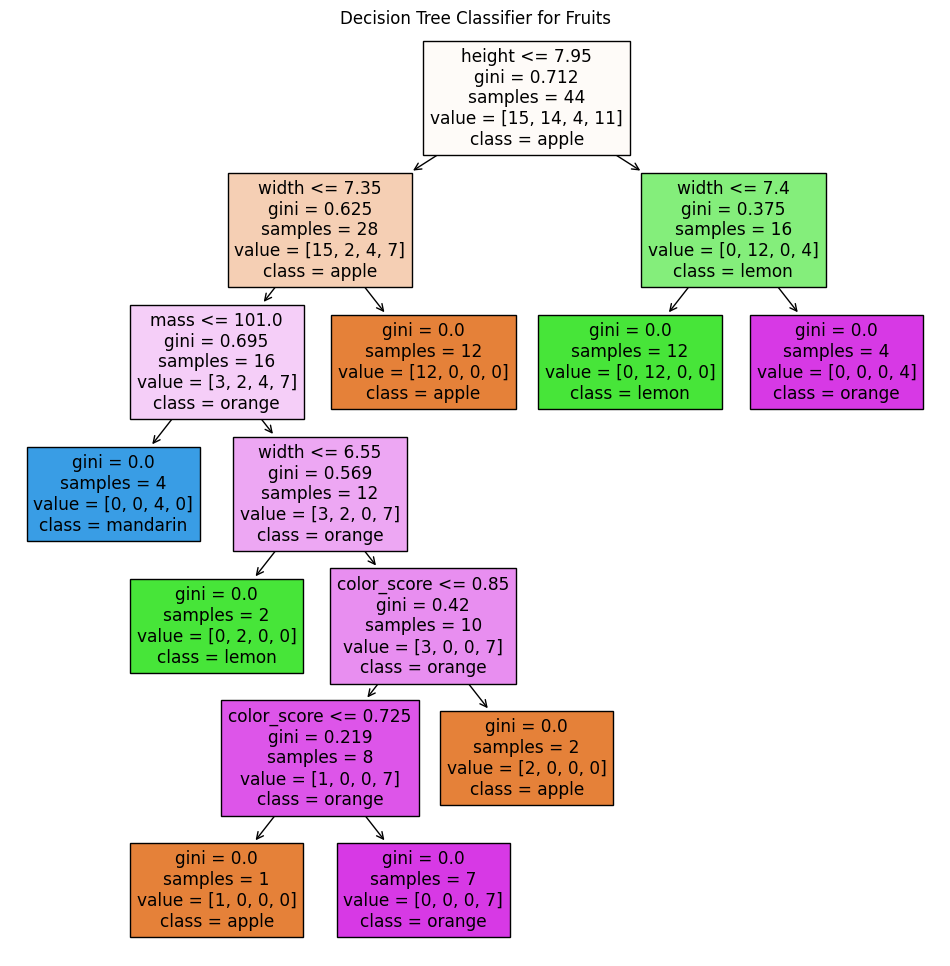

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pandas as pd

# Load and preprocess the dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X = fruits[['mass', 'width', 'height', 'color_score']].values
y = fruits['fruit_name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Encode the labels to numeric values
le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train_encoded)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, ax=ax, feature_names=['mass', 'width', 'height', 'color_score'],
              class_names=le.inverse_transform(clf.classes_), filled=True)
plt.title('Decision Tree Classifier for Fruits')
plt.show()



In [27]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))
arr.append([knn.score(X_train, y_train),knn.score(X_test, y_test)])


Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.53


In [28]:

#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

arr.append([lda.score(X_train, y_train),lda.score(X_test, y_test)])

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [29]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

arr.append([gnb.score(X_train, y_train),gnb.score(X_test, y_test)])

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [30]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
      .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
      .format(svm.score(X_test, y_test)))
arr.append([svm.score(X_train, y_train),svm.score(X_test, y_test)])


Accuracy of SVM classifier on training set: 0.59
Accuracy of SVM classifier on test set: 0.27


In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 0 0 1]
 [8 0 0 0]
 [2 0 0 0]]
              precision    recall  f1-score   support

           1       0.29      1.00      0.44         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.27        15
   macro avg       0.07      0.25      0.11        15
weighted avg       0.08      0.27      0.12        15



c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

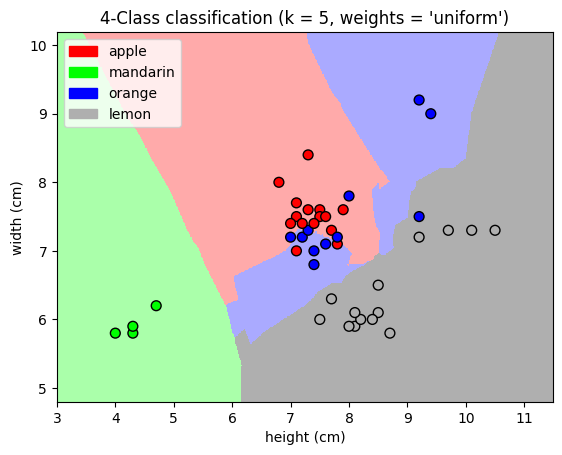

In [42]:

# Plot the decision boundary of the k-nn classifier
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map to each mesh point.
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size,
                c=y, cmap=cmap_bold, edgecolor='black')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')



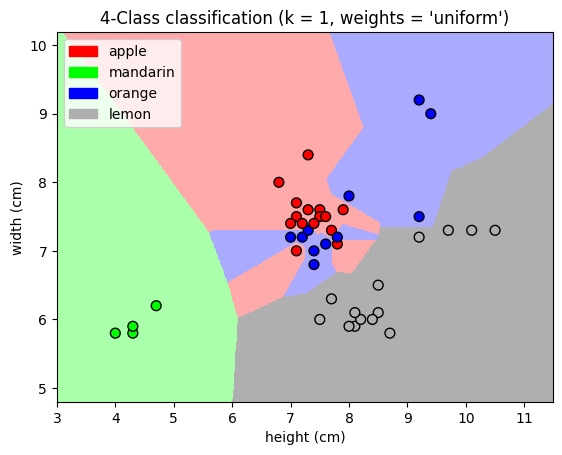

In [47]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

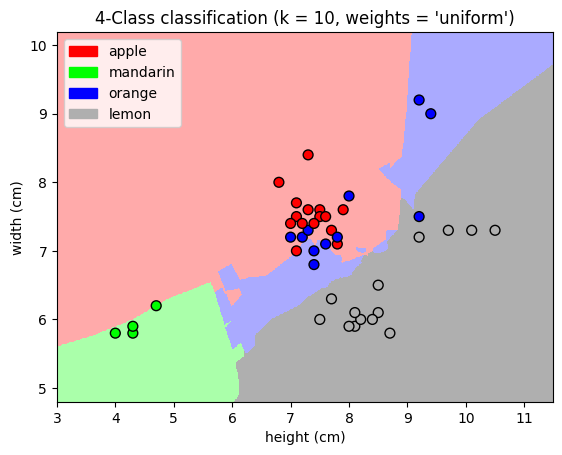

In [52]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

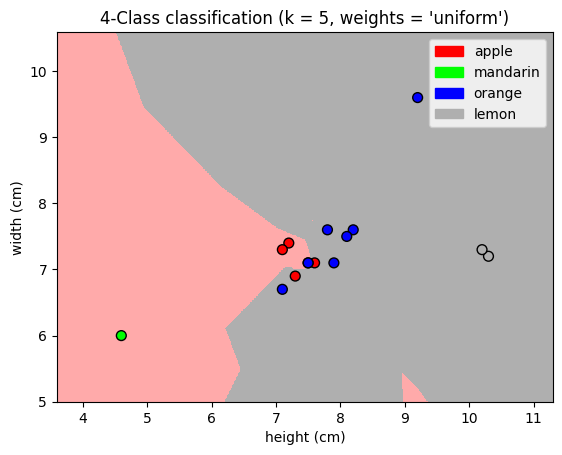

In [53]:
plot_fruit_knn(X_test, y_test, 5, 'uniform')

([<matplotlib.axis.XTick at 0x19762a61dd0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

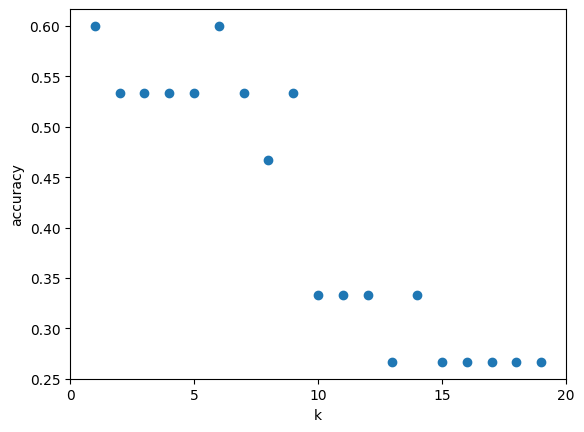

In [54]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [55]:
#PCA ON LOGISTIC REGRESSION
# Import libraries
from sklearn.decomposition import PCA

# Create an instance of PCA with desired number of components
pca = PCA(n_components=2) # You can adjust the number of components as per your requirement

# Apply PCA on the feature data
X_pca = pca.fit_transform(X)

# Get the transformed feature data after PCA
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Fit the model to the transformed feature data
logreg.fit(X_pca, y)

# Print accuracy on the training set
print('Accuracy of Logistic regression classifier on training set (after PCA): {:.2f}'
      .format(logreg.score(X_pca, y)))

# Apply PCA on the test feature data
X_test_pca = pca.transform(X_test) # X_test is the test set feature data

# Get the transformed feature data after PCA for the test set
X_test_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])

# Evaluate accuracy on the test set
test_accuracy = logreg.score(X_test_pca, y_test) # y_test is the test set labels

# Print accuracy on the test set
print('Accuracy of Logistic regression classifier on test set (after PCA): {:.2f}'
      .format(logreg.score(X_test_pca, y_test)))

arr.append([logreg.score(X_pca, y),logreg.score(X_test_pca, y_test)])


Accuracy of Logistic regression classifier on training set (after PCA): 0.80
Accuracy of Logistic regression classifier on test set (after PCA): 0.80


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
#PCA ON SVM
# Import libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Create an instance of PCA with desired number of components
pca = PCA(n_components=4) # You can adjust the number of components as per your requirement
svm = SVC(C=1.0, kernel='rbf')

# Apply PCA on the feature data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of SVM
svm = SVC()

# Fit the SVM model to the transformed training set after PCA
svm.fit(X_train_scaled, y_train)

# Print accuracy on the training set after PCA
print('Accuracy of SVM classifier on training set (after PCA): {:.2f}'
      .format(svm.score(X_train_scaled, y_train)))

# Print accuracy on the test set after PCA
print('Accuracy of SVM classifier on test set (after PCA): {:.2f}'
      .format(svm.score(X_test_scaled, y_test)))

arr.append([svm.score(X_train_scaled, y_train),svm.score(X_test_scaled, y_test)])

Accuracy of SVM classifier on training set (after PCA): 0.91
Accuracy of SVM classifier on test set (after PCA): 0.80


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the fruit dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

# Extract features and target variable
X = fruits[['mass', 'width', 'height', 'color_score']]  # Update with your feature columns
y = fruits['fruit_label']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Evaluate the accuracy of the classifier on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(train_accuracy))

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(test_accuracy))


arr.append([train_accuracy,test_accuracy])



Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.92


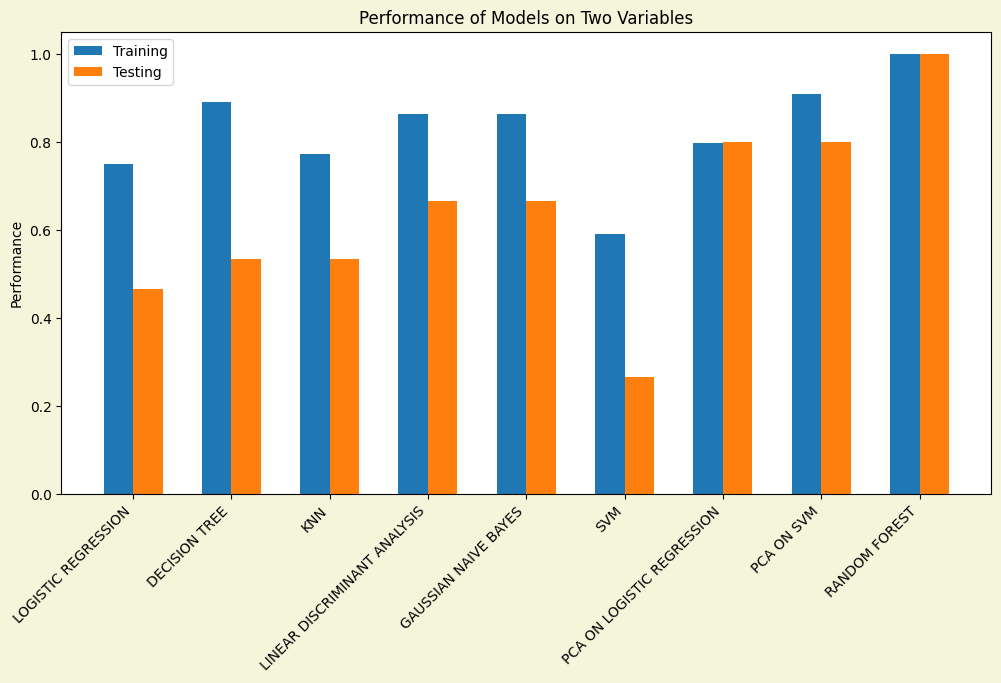

In [63]:
#COMPARING TRAIN TEST ACCURACY OF ALL MODELS ABOVE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the labels and data
labels = ['LOGISTIC REGRESSION', 'DECISION TREE', 'KNN', 'LINEAR DISCRIMINANT ANALYSIS', 'GAUSSIAN NAIVE BAYES', 'SVM', 'PCA ON LOGISTIC REGRESSION', 'PCA ON SVM', 'RANDOM FOREST']


arr = np.array(arr)

# Set the figure size and plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('BEIGE')
ax.bar(np.arange(len(labels))-0.15, data[:,0], width=0.3, label='Training')
ax.bar(np.arange(len(labels))+0.15, data[:,1], width=0.3, label='Testing')

# Add x-axis and y-axis labels, title and legend
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Performance')
ax.set_title('Performance of Models on Two Variables')
ax.legend()

# Show the plot
plt.show()

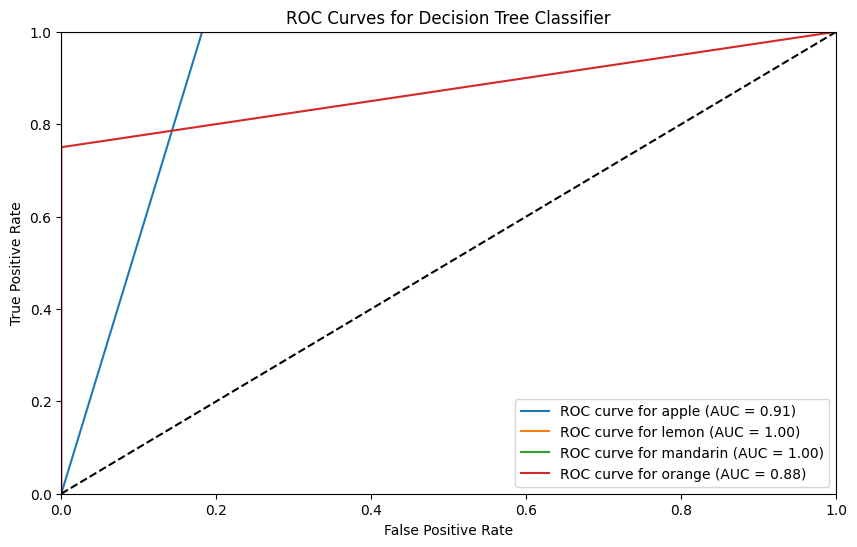

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Plot ROC curves
plt.figure(figsize=(10, 6))
for fruit_class in le.classes_:
    plt.plot(fpr[fruit_class], tpr[fruit_class], label='ROC curve for %s (AUC = %0.2f)' % (fruit_class, roc_auc[fruit_class]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot random ROC curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()
